## Gapminder: Analyzing Income per Capita for different Countries
<b>Resource</b>: http://gapm.io/dgdppc
<ul>Income per person (GDP/capita, PPP$ inflation-adjusted)
<ul><i>Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).</i>
</ul></ul>
<b>Questions posed:</b>
<li> Which country's income per person grew the most throughout the years?
<li> What is the minimum and maximum income per person as of 2019?
<li> Which country has the highest mean income per person?
<li> Why is that USA didn't make it to the top 5 countries based on income per capita? 
</ul></ul></ul>
<b><p>&nbsp;</p>Investigation</b>:
<dd>1. Import packages</dd>
<dd>2. Clean Data dropping missing values and checing for duplicates</dd>
<dd>3. Add a calculated column for Growth Rate</dd>
<dd>4. Build visualizations</dd>
<dd>5. Draw conclusions</dd>
<b><p>&nbsp;</p>Table of Contents</b>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul> <b><p>&nbsp;</p>Materials used</b>:
<li>Stackoverflow
<li>Udacity

***
## Data Wrangling
***
<a id='wrangling'></a>

<b>Import packages</b>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b>Load .csv file and get general info:</b>

In [40]:
df = pd.read_csv('income_per_person_long_series.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 1291 entries, country to 2019
dtypes: float64(1096), int64(194), object(1)
memory usage: 1.9+ MB


<b>Check head and tail of the loaded table:</b>

In [42]:
df.head(5)

,country,730,731,732,733,734,735,736,737,738,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1630,1700,1890,1910,1920.0,1960.0,2020.0,2070.0,2130.0,2210.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9660,9900,10100,10300,10600.0,11000.0,11500.0,12100.0,12700.0,13300.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12500,12600,12800,13000,13200.0,13500.0,13800.0,14200.0,14600.0,14900.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39000,42000,41900,43700,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7020,7090,7250,7320,7480.0,7670.0,7880.0,7900.0,8170.0,8460.0


In [43]:
df.tail()

,country,730,731,732,733,734,735,736,737,738,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
188,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16500,17000,17600,17500,17200.0,16800.0,16700.0,16600.0,16500.0,16400.0
189,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4510,4720,4910,5130,5360.0,5600.0,5870.0,6150.0,6450.0,6770.0
190,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4530,3760,3740,3790,3870.0,3920.0,3950.0,3990.0,4040.0,4120.0
191,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3440,3560,3700,3790,3940.0,4090.0,4220.0,4360.0,4480.0,4600.0
192,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1500,1630,1750,1790,1840.0,1900.0,1970.0,2030.0,2090.0,2150.0


<b>How many <u>null values</u> do we have?</b>

In [44]:
df.isnull().sum().sum()

200717

<b>What is the % of null values of the overall value count?</b>

In [45]:
str(round((200717/(193*1291))*100,1)) + '%'

'80.6%'

<b>How many non-null values do we have?</b>

In [46]:
df.notnull().sum().sum()

48446

<b>What is the % of non-null values of the overall value count?</b> (to double check our null total)

In [47]:
str(round((48446/(193*1291))*100,1)) + '%'

'19.4%'

<b>How many columns have at least one missing value?</b> 

In [48]:
sum(df.apply(lambda x: sum(x.isnull().values), axis = 0)>0)

1096

<b>How many <u>duplicates</u> do we have?</b> 

In [49]:
sum(df.duplicated())

0

<b>Drop columns with a minimum of 150 null values and save the result in a new table:</b> 

In [50]:
dfcopy=df.dropna(axis = 1, thresh=150)
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 221 entries, country to 2019
dtypes: float64(26), int64(194), object(1)
memory usage: 333.4+ KB


<b>Looks like over a thousand columns were dropped, from year 730 to 1800, which makes sense.</b> 

In [51]:
dfcopy.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,634.0,634.0,634.0,634.0,634.0,634.0,634.0,634.0,634.0,...,1630,1700,1890,1910,1920.0,1960.0,2020.0,2070.0,2130.0,2210.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9660,9900,10100,10300,10600.0,11000.0,11500.0,12100.0,12700.0,13300.0
2,Algeria,1360.0,1360.0,1360.0,1370.0,1370.0,1370.0,1370.0,1370.0,1370.0,...,12500,12600,12800,13000,13200.0,13500.0,13800.0,14200.0,14600.0,14900.0
3,Andorra,1260.0,1260.0,1260.0,1270.0,1270.0,1270.0,1270.0,1280.0,1280.0,...,39000,42000,41900,43700,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,650.0,653.0,656.0,658.0,661.0,664.0,667.0,670.0,672.0,...,7020,7090,7250,7320,7480.0,7670.0,7880.0,7900.0,8170.0,8460.0


In [52]:
dfcopy.tail()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
188,Venezuela,667.0,667.0,667.0,667.0,667.0,667.0,667.0,667.0,667.0,...,16500,17000,17600,17500,17200.0,16800.0,16700.0,16600.0,16500.0,16400.0
189,Vietnam,732.0,732.0,732.0,732.0,732.0,732.0,732.0,732.0,732.0,...,4510,4720,4910,5130,5360.0,5600.0,5870.0,6150.0,6450.0,6770.0
190,Yemen,923.0,926.0,928.0,931.0,933.0,936.0,938.0,941.0,943.0,...,4530,3760,3740,3790,3870.0,3920.0,3950.0,3990.0,4040.0,4120.0
191,Zambia,698.0,700.0,701.0,703.0,705.0,706.0,708.0,709.0,711.0,...,3440,3560,3700,3790,3940.0,4090.0,4220.0,4360.0,4480.0,4600.0
192,Zimbabwe,915.0,916.0,917.0,917.0,918.0,919.0,920.0,921.0,922.0,...,1500,1630,1750,1790,1840.0,1900.0,1970.0,2030.0,2090.0,2150.0


<b>Let's make sure we have the right sequence of the remaining columns and check for any potential gaps in years:</b> 

In [53]:
dfcopy.loc[0,'1800':'2019'].count() #220 means there are no missing years btw 1800 and 2019

220

<b>Now that we know no years are missing between 1800 and 2019, let's check how many columns and rows still have at least one missing value:</b> 

In [54]:
sum(dfcopy.apply(lambda x: sum(x.isnull().values), axis = 0)>0) #number of columns with at least one missing value

26

In [55]:
sum(dfcopy.apply(lambda x: sum(x.isnull().values), axis = 1)>0) #number of rows with at least one missing value

41

<b>Let's get rid of the remaining NaN values and save it as a new DF, which will result in # of Countries being reduced from 193 to 152:</b> 

In [58]:
df_clean=dfcopy.dropna(axis = 0)
df_clean.reset_index(drop=True, inplace=True)
df_clean.info()
df_clean.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Columns: 221 entries, country to 2019
dtypes: float64(26), int64(194), object(1)
memory usage: 262.6+ KB


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
147,Venezuela,667.0,667.0,667.0,667.0,667.0,667.0,667.0,667.0,667.0,...,16500,17000,17600,17500,17200.0,16800.0,16700.0,16600.0,16500.0,16400.0
148,Vietnam,732.0,732.0,732.0,732.0,732.0,732.0,732.0,732.0,732.0,...,4510,4720,4910,5130,5360.0,5600.0,5870.0,6150.0,6450.0,6770.0
149,Yemen,923.0,926.0,928.0,931.0,933.0,936.0,938.0,941.0,943.0,...,4530,3760,3740,3790,3870.0,3920.0,3950.0,3990.0,4040.0,4120.0
150,Zambia,698.0,700.0,701.0,703.0,705.0,706.0,708.0,709.0,711.0,...,3440,3560,3700,3790,3940.0,4090.0,4220.0,4360.0,4480.0,4600.0
151,Zimbabwe,915.0,916.0,917.0,917.0,918.0,919.0,920.0,921.0,922.0,...,1500,1630,1750,1790,1840.0,1900.0,1970.0,2030.0,2090.0,2150.0


<a id='eda'></a>
***
## Exploratory Data Analysis
***

-<b>Now that we have trimmed and cleaned our data, we can move on to exploration</b>-

### 1. Which country's income per person grew the most throughout the years?

<b>First, let's determine % of growth per country from 1800 to 2019, and save the result in a new column:</b>

In [59]:
df_clean['growth_rate'] = (((df_clean['2019'] - df_clean['1800'])/df_clean['1800']).round(1))
df_clean.tail()

<ipython-input-59-43b1128ad14d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['growth_rate'] = (((df_clean['2019'] - df_clean['1800'])/df_clean['1800']).round(1))


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,growth_rate
147,Venezuela,667.0,667.0,667.0,667.0,667.0,667.0,667.0,667.0,667.0,...,17000,17600,17500,17200.0,16800.0,16700.0,16600.0,16500.0,16400.0,23.6
148,Vietnam,732.0,732.0,732.0,732.0,732.0,732.0,732.0,732.0,732.0,...,4720,4910,5130,5360.0,5600.0,5870.0,6150.0,6450.0,6770.0,8.2
149,Yemen,923.0,926.0,928.0,931.0,933.0,936.0,938.0,941.0,943.0,...,3760,3740,3790,3870.0,3920.0,3950.0,3990.0,4040.0,4120.0,3.5
150,Zambia,698.0,700.0,701.0,703.0,705.0,706.0,708.0,709.0,711.0,...,3560,3700,3790,3940.0,4090.0,4220.0,4360.0,4480.0,4600.0,5.6
151,Zimbabwe,915.0,916.0,917.0,917.0,918.0,919.0,920.0,921.0,922.0,...,1630,1750,1790,1840.0,1900.0,1970.0,2030.0,2090.0,2150.0,1.3


<b>Now let's separate top 5 from the rest, so we can visualize countries whose income per person underwent a rapid growth throughout the years:</b>

In [60]:
top_5_countries_by_growth_rate = df_clean.nlargest(5, 'growth_rate')
top_5_countries_by_growth_rate.info() #make sure there're only 10 rows, but all of the columns
top_5_countries_by_growth_rate = top_5_countries_by_growth_rate.loc[:,['country','growth_rate']] #selecting country and growth rate columns only
top_5_countries_by_growth_rate.set_index('country',inplace=True) #setting index to Country
top_5_countries_by_growth_rate #checking the result

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 109 to 48
Columns: 222 entries, country to growth_rate
dtypes: float64(27), int64(194), object(1)
memory usage: 8.7+ KB


,growth_rate
country,
Qatar,117.1
Kuwait,73.5
Singapore,67.1
Saudi Arabia,64.3
Gabon,59.8


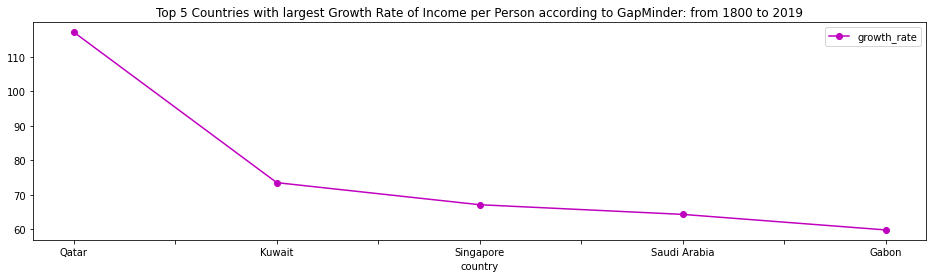

In [61]:
top_5_countries_by_growth_rate.plot(figsize=(16, 4),style='m-', marker='o', label='Series', title="Top 5 Countries with largest Growth Rate of Income per Person according to GapMinder: from 1800 to 2019");
my_xticks = ['Qatar','Kuwait','Singapore','Saudi Arabia','Gabon','Australia','UAE','Equatorial Guinea','New Zealand','Norway']

<b>Looks like Qatar beats all records!</b>

In [62]:
df_clean.query('country == "Qatar"')

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,growth_rate
109,Qatar,1160.0,1160.0,1160.0,1170.0,1170.0,1180.0,1180.0,1180.0,1190.0,...,134000,132000,128000,123000.0,122000.0,123000.0,126000.0,131000.0,137000.0,117.1


### 2. What is the minimum and maximum income per person as of 2019?

In [63]:
df_clean['2019'].describe()

count       152.000000
mean      20106.125000
std       20541.844207
min         885.000000
25%        5255.000000
50%       13300.000000
75%       28300.000000
max      137000.000000
Name: 2019, dtype: float64

In [65]:
df_clean_copy = df_clean.copy()
df_clean_copy.set_index('country',inplace=True)
df_clean_copy['2019'].tail()

country
Venezuela    16400.0
Vietnam       6770.0
Yemen         4120.0
Zambia        4600.0
Zimbabwe      2150.0
Name: 2019, dtype: float64

In [ ]:
max_inc = df_clean

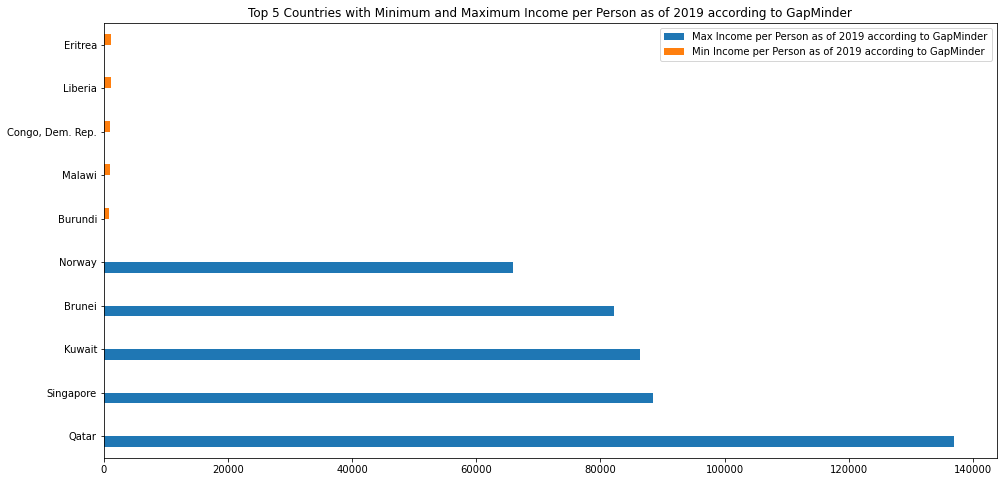

In [67]:
max_inc = df_clean_copy.nlargest(5, '2019')
max_inc_2019 = max_inc['2019']
min_inc = df_clean_copy.nsmallest(5, '2019')
min_inc_2019 = min_inc['2019']
pd.concat({'Max Income per Person as of 2019 according to GapMinder': max_inc_2019, 'Min Income per Person as of 2019 according to GapMinder': min_inc_2019}, axis=1).plot.barh(figsize=(16, 8),title="Top 5 Countries with Minimum and Maximum Income per Person as of 2019 according to GapMinder");

### 3. Which country has the highest mean income per person?

In [68]:
df_clean['mean'] = round(df_clean.iloc[:,0:221].mean(axis=1),1) #selecting all columns except for growth rate
top_5_by_mean = df_clean.nlargest(5, 'mean')
top_5_by_mean.set_index('country',inplace=True) 
top_5_countries_by_mean = top_5_by_mean['mean']
top_5_countries_by_mean

<ipython-input-68-1aa33251a09f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['mean'] = round(df_clean.iloc[:,0:221].mean(axis=1),1) #selecting all columns except for growth rate


country
Qatar                   30279.6
Brunei                  27552.6
United Arab Emirates    24907.5
Kuwait                  21410.0
Switzerland             17736.6
Name: mean, dtype: float64

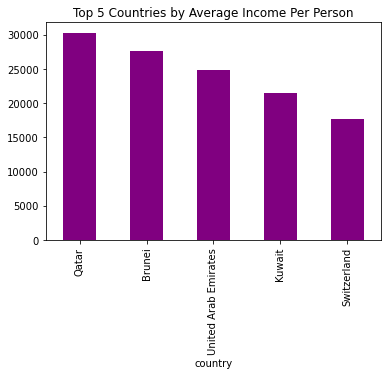

In [69]:
y=np.arange(0,100)
top_5_countries_by_mean.plot(kind='bar',color='purple', title='Top 5 Countries by Average Income Per Person');

<a id='conclusions'></a>
***
## Conclusions
***
We can see that the fastest growing country on the Income per Person arena is Qatar, a country in Middle East, rising from 1.1K USD in 1800s to 137K USD im 2019, which is the maximum value based on our GapMinder data. While Qatar is bathing in riches, we can see that Burundi, a country in east-central Africa, is dealing with the minimum income per person of only 885 USD. 

It's interesting to see that some countries that have the highest income per person as of 2019 (e.g. Norway or Sinagpore) do not necessarily have the highest mean for the overall 1800-2019 period, where UAE and Switzerland come to shine. And yet, United States is nowhere to be seen...

### 4. Why is that USA didn't make it to the top 5 countries based on income per capita?

In [70]:
USA = df_clean.query('country == "United States"')
USA_min = USA.min(axis=1)
USA_min

143    26.6
dtype: float64

In [71]:
USA_max = USA.max(axis=1)
USA_max

143    57700.0
dtype: float64

In [72]:
USA_mean = round(USA.mean(axis=1),1)
USA_mean

143    14749.3
dtype: float64

<b>Well, with a mean of 14,816 and a max of 57,700, there's no wonder USA didn't make it into the top 5. Now we know why!</b>